# Post Hoc Analysis(사후검정)

사후검정은 분산분석의 문제점을 해결하기 위해 하는 검정이다.

분산분석은 그룹간의 평균의 차이가 있는지 알수는 있지만 어떤 집단간의 차이가 있는지는 발혀낼수 없다.

사후검정은 이러한 문제점을 보완한다.

사후검정에는 여러종류가 있지만 대표적 3가지를 꼽으면 아래와 같다.

- Tukey's HSD (Honest Significant Difference) test.
- Duncan’s new multiple range test (MRT)
- Scheffé’s Method

이번 노트북에서는 Tukey를 활용해 사후검정을 실시하겠다.

# Tukey' HSD TEST

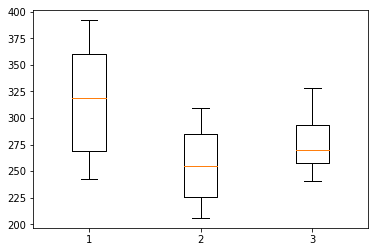

In [2]:
%matplotlib inline
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np


# url로 데이터 얻어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

# pandas로 데이터 불러오기
df = pd.DataFrame(data,columns=['value', 'treatment']).set_index('treatment')

# 예시 데이터 시각화 하기
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

In [11]:
df.head()

,value
treatment,
1.0,243.0
1.0,251.0
1.0,275.0
1.0,291.0
1.0,347.0


사후검정을 위해서는 컬럼을 구분하는 Label과 실험값을 가지고 있어야한다.

In [7]:
#reset index로 인덱스 생성함으로써 Label만듬
df2 = df.reset_index()

In [10]:
df2.head()

,treatment,value
0,1.0,243.0
1,1.0,251.0
2,1.0,275.0
3,1.0,291.0
4,1.0,347.0


#### 사후검정

In [12]:
# alpha(유의수준) -> 0.05
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df2['value'], df2['treatment'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper  reject
-----------------------------------------------
 1.0    2.0   -60.1806 -116.6056 -3.7555  True 
 1.0    3.0   -38.625  -104.8246 27.5746 False 
 2.0    3.0   21.5556   -43.2141 86.3252 False 
-----------------------------------------------


결과를 통해 Group1과 Group2 사이에만  유의미성을 가지고 있다는 것을 확인할 수 있다.

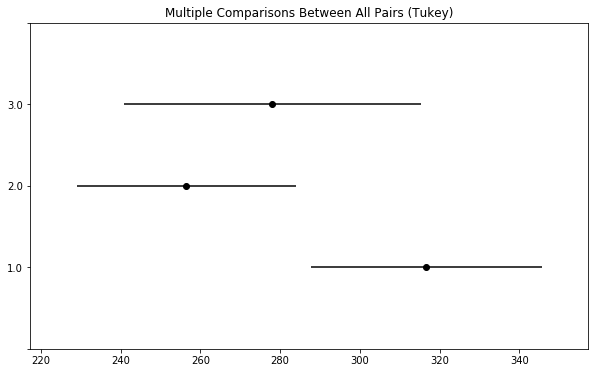

In [13]:
fig = posthoc.plot_simultaneous()

그림에서도 볼 수 있듯이 Group3는 Group1과 Group2와 겹치는 부분이 있지만 Group1,2는 겹치지지 않는다는 것을 알 수 있다.